In [1]:
# SPECIFICATIONS
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import boston_housing
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

In [2]:
# LOAD DATASET
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [3]:
# BUILD MODEL FUNCTION
def build_model(learning_rate=0.01, batch_size=10, epochs=20):
    model = Sequential()
    model.add(Dense(15, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

model = KerasRegressor(build_fn=build_model)

C:\Users\user\AppData\Local\Temp\ipykernel_14452\2662850390.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model)


In [4]:
# RANDOM SEARCH PARAMETERS
param_dist = {'learning_rate': np.linspace(0.01, 1.0, num=20),
              'batch_size': tuple(range(16, 65, 16)),
              'epochs': tuple(range(10, 31, 5))}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1)
random_result = random_search.fit(x_train, y_train)

print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_model = random_result.best_estimator_.model

Epoch 1/30
26/26 [==============================] - 0s 2ms/step - loss: 17.1124
Epoch 2/30
26/26 [==============================] - 0s 2ms/step - loss: 5.0124
Epoch 3/30
26/26 [==============================] - 0s 2ms/step - loss: 3.3567
Epoch 4/30
26/26 [==============================] - 0s 2ms/step - loss: 3.1338
Epoch 5/30
26/26 [==============================] - 0s 2ms/step - loss: 2.8567
Epoch 6/30
26/26 [==============================] - 0s 2ms/step - loss: 2.7698
Epoch 7/30
26/26 [==============================] - 0s 2ms/step - loss: 2.5673
Epoch 8/30
26/26 [==============================] - 0s 2ms/step - loss: 2.8050
Epoch 9/30
26/26 [==============================] - 0s 2ms/step - loss: 2.8423
Epoch 10/30
26/26 [==============================] - 0s 2ms/step - loss: 2.4707
Epoch 11/30
26/26 [==============================] - 0s 2ms/step - loss: 2.3717
Epoch 12/30
26/26 [==============================] - 0s 2ms/step - loss: 2.3237
Epoch 13/30
26/26 [=============================

In [5]:
# EVALUATE BEST MODEL ON TEST DATA
test_loss = best_model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

4/4 [==============================] - 0s 6ms/step - loss: 2.8126
Test Loss: 2.812612295150757


Epoch 1/30
22/22 [==============================] - 0s 4ms/step - loss: 2.1707 - val_loss: 2.1386
Epoch 2/30
22/22 [==============================] - 0s 3ms/step - loss: 1.9840 - val_loss: 1.9913
Epoch 3/30
22/22 [==============================] - 0s 4ms/step - loss: 2.1444 - val_loss: 2.0252
Epoch 4/30
22/22 [==============================] - 0s 3ms/step - loss: 2.1083 - val_loss: 1.9917
Epoch 5/30
22/22 [==============================] - 0s 3ms/step - loss: 2.2005 - val_loss: 2.3754
Epoch 6/30
22/22 [==============================] - 0s 3ms/step - loss: 1.9806 - val_loss: 2.2353
Epoch 7/30
22/22 [==============================] - 0s 3ms/step - loss: 2.0347 - val_loss: 2.1716
Epoch 8/30
22/22 [==============================] - 0s 3ms/step - loss: 1.9989 - val_loss: 2.6226
Epoch 9/30
22/22 [==============================] - 0s 3ms/step - loss: 2.0757 - val_loss: 2.3462
Epoch 10/30
22/22 [==============================] - 0s 3ms/step - loss: 2.2182 - val_loss: 2.3076
Epoch 11/30
22/22 [

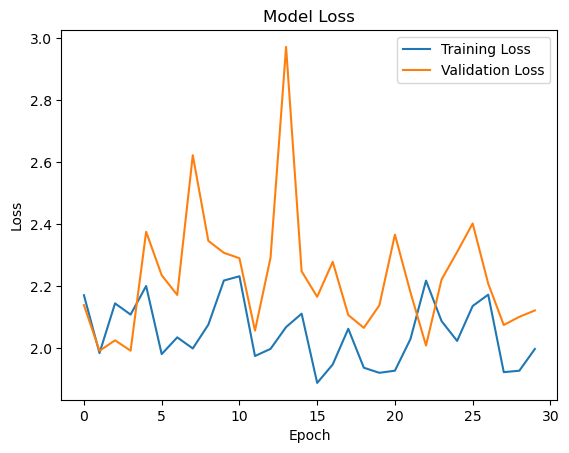

In [6]:
# TRAINING AND VALIDATION PLOT
import matplotlib.pyplot as plt
history = best_model.fit(x_train, y_train, epochs=random_result.best_params_['epochs'], batch_size=random_result.best_params_['batch_size'], validation_split=0.15)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()